# Simple Foreground Background Diff

Here we have a background picture and we would like to discover new objects on top of this background.

We will use the simple opencv4.core function **absdiff** and then apply a simple and large **threshold** to pick up all the new objects.

The reference clojure code file can be found here: [bgdiff.clj](https://github.com/hellonico/opencv-fun/blob/master/test/opencv4/bgdiff.clj)

Let's see first what our background looks like. 

Then put our hand in front of that background. 

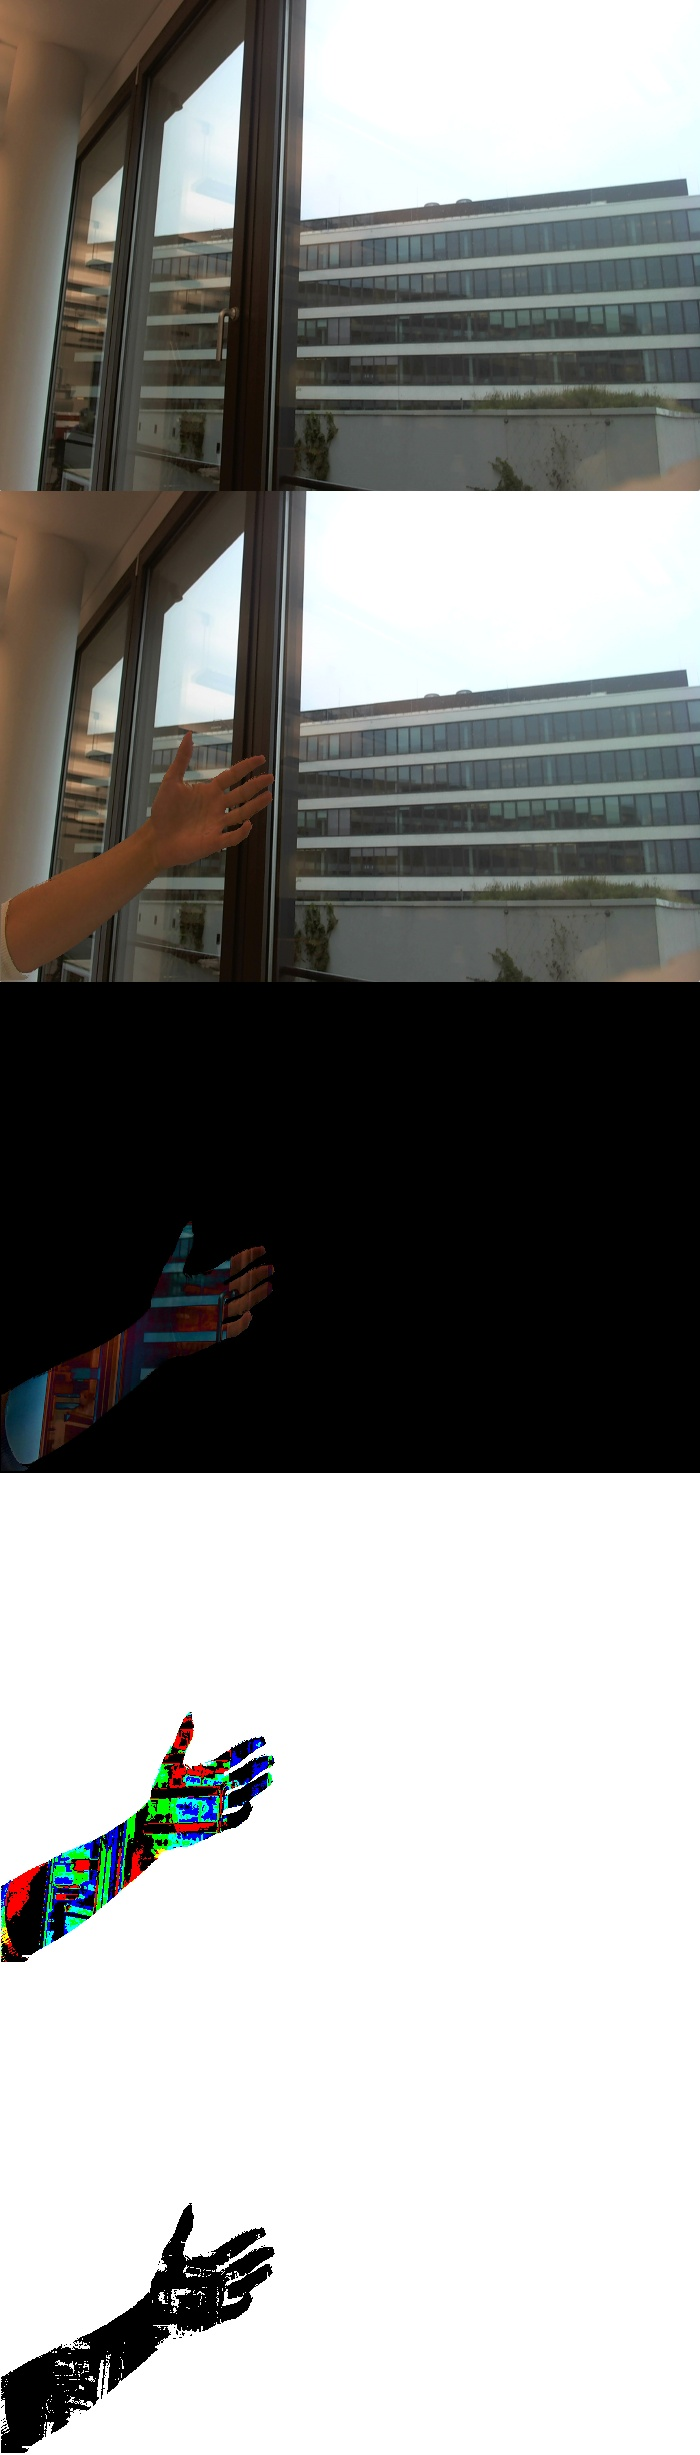

In [10]:
(ns opencv4.bgdiff
  (:require
    [opencv4.core :refer :all]
    [opencv4.utils :as u]))

; https://stackoverflow.com/questions/27035672/cv-extract-differences-between-two-images
(def bg (imread "resources/images/bgdiff/header.png"))
(def fg (imread "resources/images/bgdiff/front.png"))

(def output (new-mat))
(absdiff bg fg output)

; diff in color
(def fg-1
  (-> output
  clone
  (threshold! 10 255 1)
  (imwrite "output/bgdiff.png")))

; diff in gray
(def fg-2
 (-> output
  clone
  (cvt-color! COLOR_RGB2GRAY)
  (threshold! 10 255 1)
  (imwrite "output/bgdiff.png")))

(u/>>>
  (vconcat! [bg fg output fg-1 (cvt-color! fg-2 COLOR_GRAY2RGB)]))

Then put our hand in front of that background. 

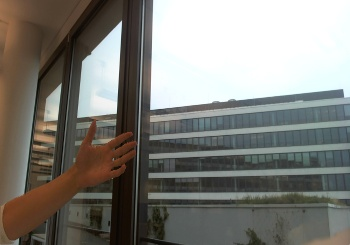

In [11]:
(def fg (-> "resources/images/bgdiff/front.png" imread (u/resize-by 0.5)))
(u/>>> fg)

The **absdiff** function from OpenCV core is used, and we can directly see the output. 

In [14]:
(def output (new-mat))
(println bg)
(println fg)
(absdiff bg fg output)
(u/>>> output)

#object[org.opencv.core.Mat 0x397b2483 Mat [ 491*700*CV_8UC3, isCont=true, isSubmat=false, nativeObj=0x7f6fc0066990, dataAddr=0x7f6fc0468a80 ]]
#object[org.opencv.core.Mat 0x7a5137ed Mat [ 245*350*CV_8UC3, isCont=true, isSubmat=false, nativeObj=0x7f6fc0343370, dataAddr=0x7f6fc1433540 ]]


CvException cv::Exception: OpenCV(4.3.0) /home/vagrant/origami-land/opencv-native/opencv/modules/core/src/arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'
  org.opencv.core.Core.absdiff_0 (Core.java:-2)
CvException cv::Exception: OpenCV(4.3.0) /home/vagrant/origami-land/opencv-native/opencv/modules/imgcodecs/src/loadsave.cpp:919: error: (-215:Assertion failed) !image.empty() in function 'imencode'
  org.opencv.imgcodecs.Imgcodecs.imencode_1 (Imgcodecs.java:-2)


class org.opencv.core.CvException: 